In [59]:
!pip3 install --user annoy

  Created wheel for annoy: filename=annoy-1.17.0-cp38-cp38-win_amd64.whl size=52796 sha256=885a334b37a8f388856fc243f4a8a4a0905507973e7f55fa78111263b2053320
  Stored in directory: c:\users\15512\appdata\local\pip\cache\wheels\77\01\de\4421524f9997a25dfa7291121565d12ef514154945e80e907a
Successfully built annoy


In [8]:
from utilities import *
import matplotlib.pyplot as plt

In [5]:
def generate_benchmark1(num_of_search):
    user_vectors = getNumpyArray(pd.read_csv('user_factors.csv', sep=',').values[1:])
    item_vectors = getNumpyArray(pd.read_csv('values.csv', sep=',').values[1:])
    t = build_annoy(item_vectors, 10)
    recall_list, queries_per_sec_list_bf, queries_per_sec_list_ay = benchmark(t, user_vectors, item_vectors, num_of_search)
    plot_results(recall_list, queries_per_sec_list_bf, queries_per_sec_list_ay, num_of_search)
    

100%|██████████████████████████████████████████████████████████████████████████| 75000/75000 [01:00<00:00, 1249.00it/s]


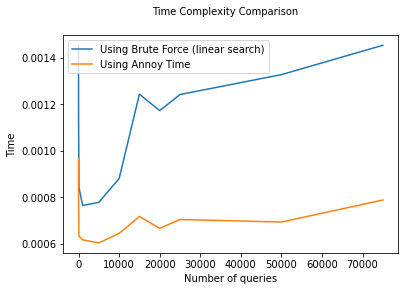

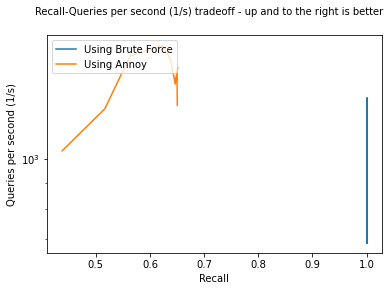

In [11]:
generate_benchmark1([1, 10, 100, 1000, 5000, 10000, 15000, 20000, 25000, 50000, 75000])

In [9]:
def generate_benchmark2(num_of_tree, search_num = 10000):
    user_vectors = getNumpyArray(pd.read_csv('user_factors.csv', sep=',').values[1:])
    item_vectors = getNumpyArray(pd.read_csv('values.csv', sep=',').values[1:])
    recall = list()
    exe_time = list()
    for i in num_of_tree:
        t = build_annoy(item_vectors, i)
        recall_list, queries_per_sec_list_bf, queries_per_sec_list_ay = benchmark(t, user_vectors, item_vectors, [search_num])
        recall.append(recall_list[0]) 
        exe_time.append(queries_per_sec_list_ay[0])
    # Time Complexity
    plt.plot(num_of_tree, recall, label="Recall")
    plt.xlabel('Number of trees')
    plt.ylabel('Recall')
    plt.legend(loc="upper left")
    plt.suptitle('Time Complexity Comparison', fontsize=10)
    plt.show()
    plt.plot(num_of_tree, exe_time, label="Execution time")
    plt.xlabel('Number of trees')
    plt.ylabel('Execution time')
    plt.legend(loc="upper left")
    plt.suptitle('Time Complexity Comparison', fontsize=10)
    plt.show()

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:16<00:00, 590.38it/s]


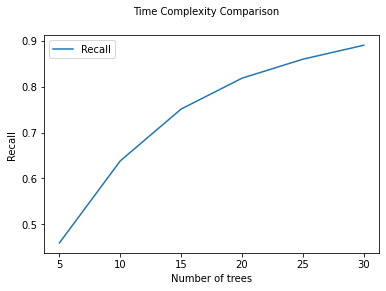

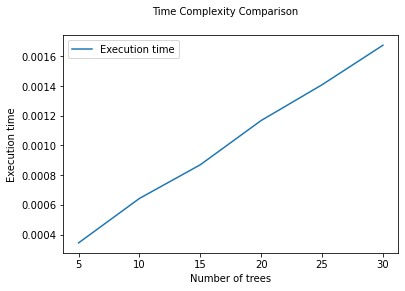

In [10]:
generate_benchmark2([5,10,15,20,25,30], search_num = 10000)